Membership Weighted K-Means is a clustering algorithm that combines the concepts of membership degrees from fuzzy clustering and weighted k-means. In this approach, each data point is assigned membership degrees (probabilities) for belonging to each cluster, and weights can be applied to the data points to indicate their importance in the clustering process. This allows for both soft clustering and consideration of data point weights.

## Kmeans vs Membership Weighted K-Means

Membership Weighted K-Means and traditional K-Means are two different clustering algorithms with distinct characteristics and use cases.
1. **Clustering Approach**:
   - **Traditional K-Means**: Traditional K-Means is a hard clustering algorithm, which means that each data point is assigned to one and only one cluster. It seeks to find the cluster center (centroid) that minimizes the sum of squared distances between data points and their assigned cluster centers.
   - **Membership Weighted K-Means**: Membership Weighted K-Means is a soft clustering algorithm, incorporating fuzzy clustering concepts. It assigns membership degrees (probabilities) to data points, indicating the likelihood of each point belonging to each cluster. This allows data points to belong partially to multiple clusters simultaneously.

2. **Cluster Assignments**:
   - **Traditional K-Means**: In traditional K-Means, each data point is assigned a single, hard cluster label, making it exclusive to one cluster.
   - **Membership Weighted K-Means**: In Membership Weighted K-Means, each data point is assigned membership degrees for each cluster, indicating the degree of belongingness to each cluster.

3. **Output**:
   - **Traditional K-Means**: The output consists of cluster assignments for each data point, i.e., each data point belongs to one cluster.
   - **Membership Weighted K-Means**: The output includes membership degrees (probabilities) for each data point across all clusters, allowing for a more nuanced understanding of cluster association.

4. **Use Cases**:
   - **Traditional K-Means**: Traditional K-Means is suitable when you want to partition data points into mutually exclusive clusters. It is widely used in various applications like customer segmentation, image compression, and document categorization.
   - **Membership Weighted K-Means**: Membership Weighted K-Means is appropriate when you want to capture the uncertainty or partial membership of data points in multiple clusters. It is used in cases where data points may belong to more than one category simultaneously, such as soft image segmentation, fuzzy document clustering, or cases where data point importance varies.

5. **Complexity**:
   - **Traditional K-Means**: Traditional K-Means is computationally less complex compared to Membership Weighted K-Means since it involves straightforward centroid updates based on hard cluster assignments.
   - **Membership Weighted K-Means**: Membership Weighted K-Means is computationally more complex due to the calculation of membership degrees for each data point and the consideration of weighted data points.

6. **Implementation**:
   - **Traditional K-Means**: Implementation is relatively straightforward and available in many machine learning libraries such as scikit-learn.
   - **Membership Weighted K-Means**: Implementation may require custom code or the use of specialized libraries that support fuzzy clustering with weighted data.

NOTE:
Traditional K-Means is suitable for hard clustering problems where data points belong exclusively to one cluster. Membership Weighted K-Means is useful when you need to account for the partial membership of data points in multiple clusters and consider data point importance through weights.

Here are some common use cases for Membership Weighted K-Means:

1. **Outlier Handling**: Membership weights can be used to downweight outliers, reducing their influence on cluster centroids. This makes the clustering algorithm more robust to noisy data.

2. **Imbalanced Data**: When dealing with imbalanced datasets, where some clusters are much smaller than others, assigning higher weights to the minority class can help in obtaining better cluster centroids and improving the separation of smaller clusters.

3. **Anomaly Detection**: In anomaly detection, you often want to identify data points that deviate significantly from the norm. By assigning low weights to normal data points and high weights to potential anomalies, Membership Weighted K-Means can help in detecting anomalies effectively.

4. **Personalization**: When clustering user preferences or behavior for personalization in recommendation systems, you might want to assign different weights to user interactions based on their recency or importance. This allows you to prioritize recent interactions or important actions when forming user segments.

5. **Customer Segmentation**: In customer segmentation, not all customers are equally valuable. Membership weights can reflect the value or profitability of a customer, helping businesses focus on their most valuable segments.

6. **Time-Series Data**: For time-series data, assigning weights based on time stamps can give more importance to recent data points, making the clustering algorithm adapt to changes over time.

7. **Feature Importance**: In feature selection or feature engineering, you can use Membership Weighted K-Means to emphasize the most informative features while clustering. This can help in finding clusters that are more relevant for predictive modeling.

8. **Anchored Clustering**: Sometimes, you may have predefined anchor points or centroids. Membership weights can be used to adjust the influence of these anchors on the clustering process.

9. **Cost-Sensitive Clustering**: In certain applications, the cost of misclassifying a data point into the wrong cluster can vary. Membership weights can be used to reflect the cost sensitivity of different data points.

10. **Hybrid Clustering**: Membership Weighted K-Means can be integrated with other clustering techniques to create hybrid clustering algorithms that take both distance-based and membership-based information into account.

When using Membership Weighted K-Means, it's essential to carefully choose or compute the membership weights based on the specific problem you are solving. The appropriate weighting strategy will depend on the characteristics of your data and the goals of your clustering task.

In [1]:
import numpy as np
from sklearn.cluster import KMeans

In [2]:

# Generate or load your dataset (replace this with your actual data)
# For demonstration purposes, we'll generate a random dataset.
np.random.seed(0)
n_samples = 300
n_features = 2
data = np.random.randn(n_samples, n_features)
data.shape

(300, 2)

In [3]:
# Generate random cluster memberships (replace this with your actual memberships)
# In a real-world scenario, you would have actual membership values.
# For demonstration purposes, we'll generate random memberships.
n_clusters = 3
memberships = np.random.rand(n_samples, n_clusters)
print(memberships)
memberships /= memberships.sum(axis=1)[:, np.newaxis]

[[5.68217594e-01 2.46556940e-01 5.96433065e-01]
 [1.17525643e-01 9.75883868e-01 9.32561204e-01]
 [3.91796939e-01 2.42178594e-01 2.50398213e-01]
 [4.83393535e-01 3.99928019e-02 6.39705106e-01]
 [4.08302908e-01 3.77406573e-01 8.09364971e-01]
 [7.09035460e-01 9.54333815e-01 3.51936240e-01]
 [8.97542765e-01 7.69967186e-01 3.57424652e-01]
 [6.21665436e-01 2.88569958e-01 8.74399917e-01]
 [1.12427317e-01 2.12434361e-01 1.83033292e-01]
 [4.03026002e-01 7.45232960e-01 5.26907449e-01]
 [4.87676324e-01 5.45964897e-04 4.25401725e-01]
 [6.35537748e-02 2.08253252e-01 9.32393939e-01]
 [2.15398204e-01 8.58337639e-01 8.02893372e-01]
 [1.59146237e-01 6.05711957e-01 1.15661872e-01]
 [7.27888158e-01 6.37462277e-01 8.11938562e-01]
 [4.79384549e-01 9.14863088e-01 4.93489468e-02]
 [2.92888565e-01 7.15052597e-01 4.18109212e-01]
 [1.72951354e-01 1.07210745e-01 8.17339111e-01]
 [4.73142978e-01 8.82283672e-01 7.33289134e-01]
 [4.09726206e-01 3.73511014e-01 5.15638347e-01]
 [8.89059953e-01 7.37278580e-01 5.152964

In [4]:


# Number of clusters you want to find
n_clusters_to_find = 3

# Define the number of iterations and other K-Means parameters
n_init = 10  # Number of times the algorithm will be run with different centroids
max_iter = 300  # Maximum number of iterations for each single run

# Initialize an array to store cluster centers
cluster_centers = np.zeros((n_clusters_to_find, n_features))

In [5]:


# Membership Weighted K-Means
for i in range(n_clusters_to_find):
    # Create a weighted dataset by repeating each data point based on its membership
    weighted_data = np.repeat(data, np.round(memberships[:, i] * n_samples).astype(int), axis=0)

    # Apply K-Means clustering to the weighted data
    kmeans = KMeans(n_clusters=1, n_init=n_init, max_iter=max_iter)
    kmeans.fit(weighted_data)

    # Store the cluster center as the new cluster center
    cluster_centers[i] = kmeans.cluster_centers_

# The resulting cluster_centers array contains the centers of the clusters found by MWK-Means.
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
[[-0.08714662 -0.0142298 ]
 [-0.07815745 -0.07751896]
 [-0.09179328  0.0190049 ]]


In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data  # Features
target = iris.target  # Ground truth labels

# Number of clusters you want to find
n_clusters_to_find = 3

# Define the number of iterations and other K-Means parameters
n_init = 10  # Number of times the algorithm will be run with different centroids
max_iter = 300  # Maximum number of iterations for each single run

# Initialize an array to store cluster centers
cluster_centers = np.zeros((n_clusters_to_find, data.shape[1]))

# Membership Weighted K-Means
for i in range(n_clusters_to_find):
    # Create a weighted dataset based on the true labels (species)
    weighted_data = data[target == i]

    # Apply K-Means clustering to the weighted data
    kmeans = KMeans(n_clusters=1, n_init=n_init, max_iter=max_iter)
    kmeans.fit(weighted_data)

    # Store the cluster center as the new cluster center
    cluster_centers[i] = kmeans.cluster_centers_

# The resulting cluster_centers array contains the centers of the clusters found by MWK-Means.
print("Cluster Centers:")
print(cluster_centers)


C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


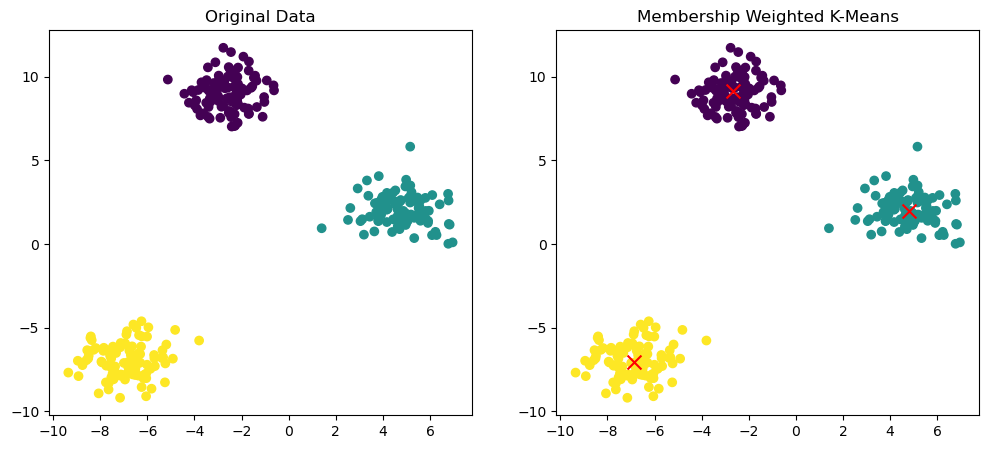

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate random data
n_samples = 300
n_clusters = 3
random_state = 42

X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=random_state)

# Initialize K-Means with scikit-learn
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

# Function for Membership Weighted K-Means
def membership_weighted_kmeans(X, n_clusters, weights, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        new_centroids = np.zeros((n_clusters, n_features))
        for i in range(n_clusters):
            if np.sum(weights[cluster_assignments == i]) == 0:
                continue
            new_centroids[i] = np.sum(X[cluster_assignments == i] * weights[cluster_assignments == i, np.newaxis], axis=0) / np.sum(weights[cluster_assignments == i])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_assignments

# Generate random weights for each data point (for demonstration purposes)
weights = np.random.rand(n_samples)

# Normalize weights to sum to 1
weights /= weights.sum()

# Run Membership Weighted K-Means
weighted_centroids, weighted_cluster_assignments = membership_weighted_kmeans(X, n_clusters, weights)

# Plot the results
plt.figure(figsize=(12, 5))

# Plot the data points
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Original Data")

# Plot the clusters with weighted centroids
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=weighted_cluster_assignments, cmap='viridis')
plt.scatter(weighted_centroids[:, 0], weighted_centroids[:, 1], c='red', marker='x', s=100)
plt.title("Membership Weighted K-Means")

plt.show()


In [8]:
#create 10x2 data
data = np.array([[6,8],[-4,-9],[4,-4],[7,-5],[0,0],[-7,8],[1,10],[-8,-1],[0,6],[-7,7]])

In [9]:
data.shape

(10, 2)

In [10]:
no_of_clusters = 2
init_prob = 1/no_of_clusters
# fill the membership with probability values of row X clusters values 
membership=np.full((data.shape[0],no_of_clusters), init_prob)
membership

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [11]:
# Find the mean for 1st cluster.
# multiple data with all the values and get the mean based on column wise
m1 = np.sum(data*membership[:,0][:,np.newaxis], axis=0)
m1

array([-4., 10.])

In [12]:
# Find the mean for 2nd cluster
# multiple data with all the values and get the mean based on column wise
m2 = np.sum(data*membership[:,1][:,np.newaxis], axis=0)
m2

array([-4., 10.])

In [13]:
z_i_j = np.subtract(data, m1)
z_i_j

array([[ 10.,  -2.],
       [  0., -19.],
       [  8., -14.],
       [ 11., -15.],
       [  4., -10.],
       [ -3.,  -2.],
       [  5.,   0.],
       [ -4., -11.],
       [  4.,  -4.],
       [ -3.,  -3.]])

In [14]:
i=0
temp=[]
cov_matrix=np.identity((no_of_clusters))

for i in range(data.shape[0]):
    z_i_j=np.subtract(data[i,:], m1)
    z_i_j = z_i_j.reshape(2,1)
    z=np.matmul(z_i_j.T, z_i_j)
    p_mult_z=z*membership[i,0]
    temp.append(p_mult_z)

cov1=sum(temp)
print(cov1)
cov_matrix[0,0]=cov1
cov_matrix

[[706.]]


array([[706.,   0.],
       [  0.,   1.]])

In [15]:
cov_inv=np.linalg.inv(cov_matrix)
z_i_j=np.subtract(data[0,:], m1)
z=np.matmul(z_i_j.T, cov_inv)
zz = np.matmul(z, z_i_j)
determinant = np.linalg.det(cov_matrix)
const_part = 1/(2*np.pi)**(data.shape[1]/2)

probability_1 = const_part * np.sqrt(determinant) * np.exp((-0.5)*zz)
probability_1

0.5331827849933758